### Importing Libraries

In [172]:
import pandas as pd

In [174]:
import numpy as np

In [176]:
import matplotlib.pyplot as plt

In [178]:
import seaborn as sns

In [180]:
from sklearn.preprocessing import LabelEncoder

In [182]:
from sklearn.preprocessing import MinMaxScaler

In [184]:
from sklearn.model_selection import train_test_split

In [200]:
import warnings
warnings.filterwarnings('ignore')

In [202]:
data_frame = pd.read_csv("hotel_booking.csv")

In [203]:
data_frame.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [204]:
data_frame.info()
data_frame.describe()
data_frame.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [273]:
data_frame.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [210]:
data_frame.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [212]:
data_frame.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461,48,6,1,28


#### There is 4 null values in childern so we fill this null value with high frequency value ie 0

In [214]:
data_frame['children'].isnull().sum()

4

In [40]:
data_frame['children'].value_counts()

children
0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [42]:
data_frame['children'] = data_frame['children'].fillna(0)

#### For country

In [222]:
data_frame['country'].isnull().sum()

488

In [224]:
data_frame['country'].value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [226]:
data_frame.dropna(subset=['country'], inplace=True)

In [228]:
data_frame['country'].isnull().sum()

0

### For Agent

In [234]:
data_frame['agent'].isnull().sum()

16006

In [236]:
data_frame['agent'].describe()

count    102896.000000
mean         86.544074
std         110.713678
min           1.000000
25%           9.000000
50%          14.000000
75%         229.000000
max         535.000000
Name: agent, dtype: float64

#### Here quantile(0.75) value seems more real than mean and median one, so let's fill the missing values with quantile(0.75) value.

In [239]:
data_frame['agent']=data_frame['agent'].fillna(data_frame['agent'].quantile(0.75))

In [241]:
data_frame['agent'].isnull().sum()

0

In [67]:
data_frame.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

In [243]:
data_frame['company'].isnull().sum()

112279

#### The company column has a large percentage of missing values (like 112,279 nulls out of 119,390, which is ~94%), so we fill all null value with Placeholder -1.0 

In [245]:
data_frame['company'] = data_frame['company'].fillna(-1.0)

In [247]:
data_frame['company'].isnull().sum()

0

In [253]:
duplicate_rows = data_frame.duplicated()
duplicate_count = duplicate_rows.sum()
print(duplicate_count)

0


In [81]:
data_frame

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [83]:
data_frame['is_canceled'].value_counts()

is_canceled
0    74745
1    44157
Name: count, dtype: int64

### Encoding Categorial Variables

In [87]:
label_encoder = LabelEncoder()

In [335]:
data_frame['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [337]:
data_frame['hotel']=label_encoder.fit_transform(data_frame['hotel'])

In [339]:
data_frame[['hotel']]

,hotel
0,1
1,1
2,1
3,1
4,1
...,...
119385,0
119386,0
119387,0
119388,0


In [95]:
mapping_dict = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

In [97]:
mapping_dict

{0: 'City Hotel', 1: 'Resort Hotel'}

In [255]:
data_frame['arrival_date_month']=label_encoder.fit_transform(data_frame['arrival_date_month'])

In [275]:
mapping_dict = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))
mapping_dict

{0: 'April',
 1: 'August',
 2: 'December',
 3: 'February',
 4: 'January',
 5: 'July',
 6: 'June',
 7: 'March',
 8: 'May',
 9: 'November',
 10: 'October',
 11: 'September'}

In [277]:
data_frame['arrival_date_month'].unique()

array([ 5,  1, 11, 10,  9,  2,  4,  3,  7,  0,  8,  6])

#### For feature customer_type

In [280]:
data_frame['customer_type'] = label_encoder.fit_transform(data_frame['customer_type'])

In [282]:
data_frame['reservation_status'] = label_encoder.fit_transform(data_frame['reservation_status'])

In [284]:
data_frame['meal'] = label_encoder.fit_transform(data_frame['meal'])

In [286]:
data_frame['distribution_channel'] = label_encoder.fit_transform(data_frame['distribution_channel'])

In [288]:
data_frame['reserved_room_type'] = label_encoder.fit_transform(data_frame['reserved_room_type'])

In [290]:
data_frame['assigned_room_type'] = label_encoder.fit_transform(data_frame['assigned_room_type'])

In [292]:
data_frame['deposit_type'] = label_encoder.fit_transform(data_frame['deposit_type'])

In [294]:
data_frame['country'] = label_encoder.fit_transform(data_frame['country'])

In [296]:
data_frame['market_segment'] = label_encoder.fit_transform(data_frame['market_segment'])

In [298]:
data_frame['name'] = label_encoder.fit_transform(data_frame['name'])

In [299]:
data_frame['email'] = label_encoder.fit_transform(data_frame['email'])

In [301]:
data_frame['phone-number'] = label_encoder.fit_transform(data_frame['phone-number'])

In [304]:
data_frame['credit_card'] = label_encoder.fit_transform(data_frame['credit_card'])

In [351]:
data_frame['reservation_status_date'] = label_encoder.fit_transform(data_frame['reservation_status_date'])

### Data Visuilization

<Axes: xlabel='hotel', ylabel='count'>

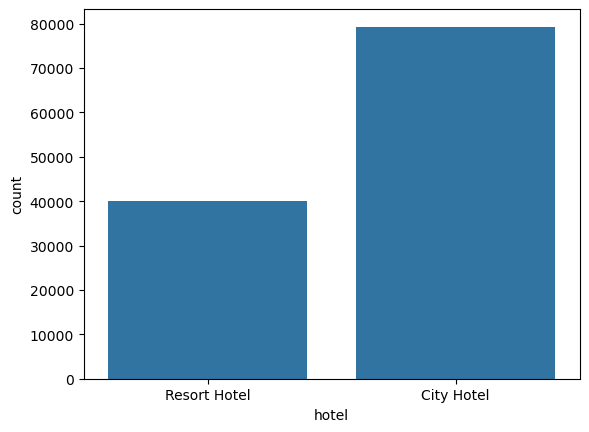

In [119]:
sns.countplot(x='hotel', data=data_frame)

<Axes: ylabel='count'>

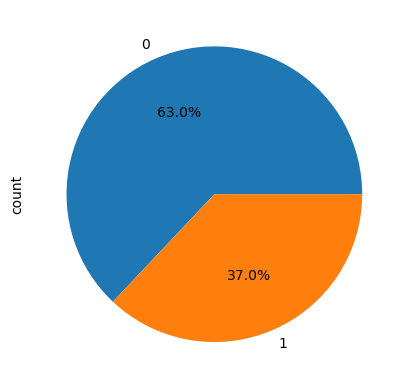

In [121]:
data_frame['is_canceled'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='Frequency'>

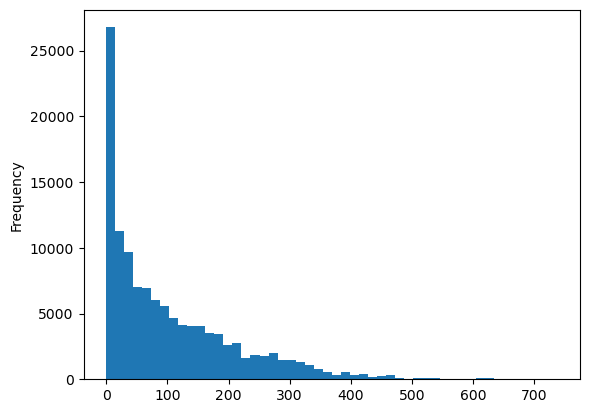

In [123]:
data_frame['lead_time'].plot(kind='hist', bins=50)

<Axes: xlabel='arrival_date_month'>

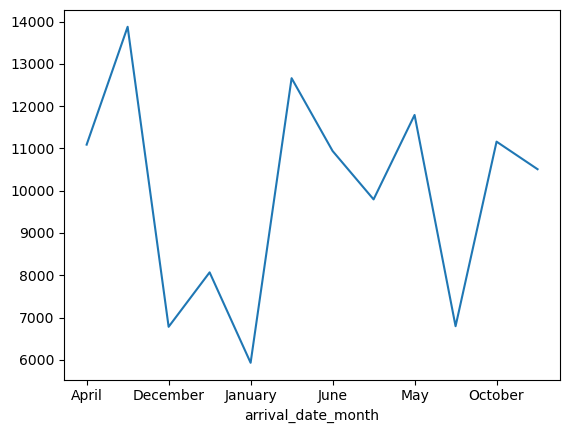

In [125]:
data_frame.groupby('arrival_date_month')['hotel'].count().plot(kind='line')

<Axes: xlabel='deposit_type', ylabel='count'>

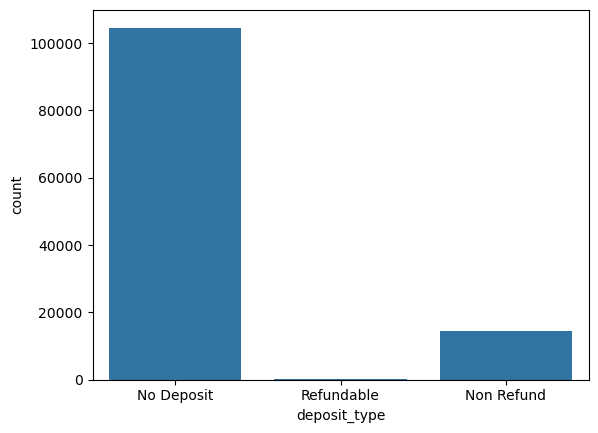

In [127]:
sns.countplot(x='deposit_type', data=data_frame)

<Axes: xlabel='required_car_parking_spaces', ylabel='count'>

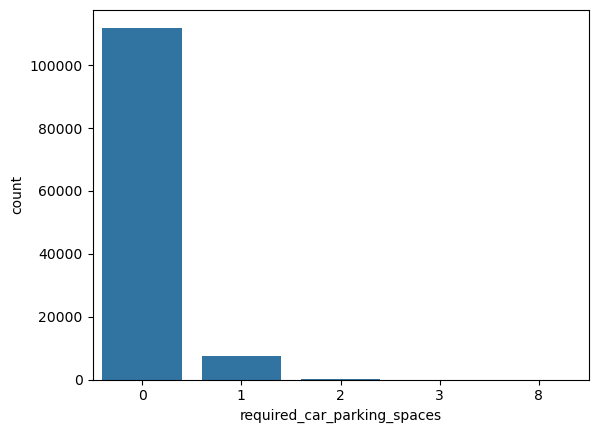

In [129]:
sns.countplot(x='required_car_parking_spaces', data=data_frame)


### Normalization

In [306]:
scaler = MinMaxScaler()

In [353]:
data_frame['reservation_status_date'] = scaler.fit_transform(data_frame[['reservation_status_date']])

In [310]:
data_frame['email'].describe()

count    118902.000000
mean          0.499279
std           0.288115
min           0.000000
25%           0.249439
50%           0.498921
75%           0.747971
max           1.000000
Name: email, dtype: float64

In [312]:
data_frame['email'].describe()

count    118902.000000
mean          0.499279
std           0.288115
min           0.000000
25%           0.249439
50%           0.498921
75%           0.747971
max           1.000000
Name: email, dtype: float64

In [314]:
columns_to_normalize = ['lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'meal','name', 'email',
       'phone-number', 'credit_card', 'reservation_status_date'] 

data_frame[columns_to_normalize] = scaler.fit_transform(data_frame[columns_to_normalize])

In [316]:
x = data_frame[['hotel', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card']]

y = data_frame['is_canceled']

In [656]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify = y)

In [658]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((95121, 35), (23781, 35), (95121,), (23781,))

In [660]:
data_frame['is_canceled'].vale_counts()

is_canceled
0    74745
1    44157
Name: count, dtype: int64

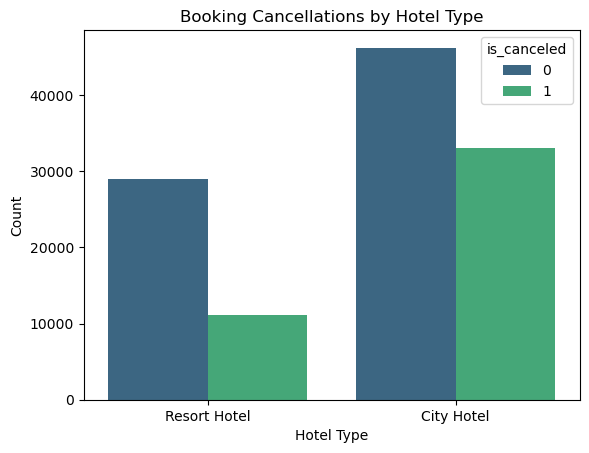

In [131]:
sns.countplot(data=data_frame, x='hotel', hue='is_canceled', palette='viridis')
plt.title('Booking Cancellations by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

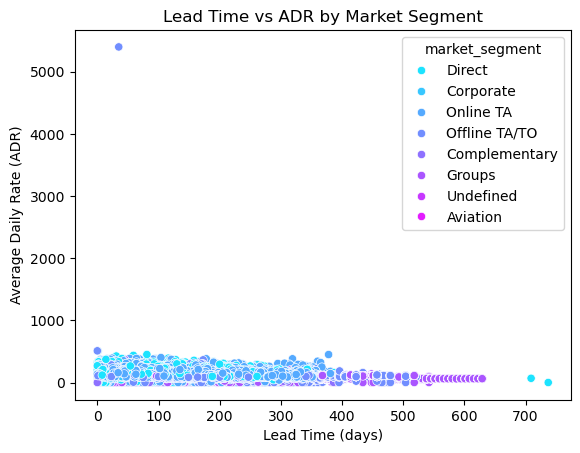

In [133]:
sns.scatterplot(data=data_frame, x='lead_time', y='adr', hue='market_segment', palette='cool')
plt.title('Lead Time vs ADR by Market Segment')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

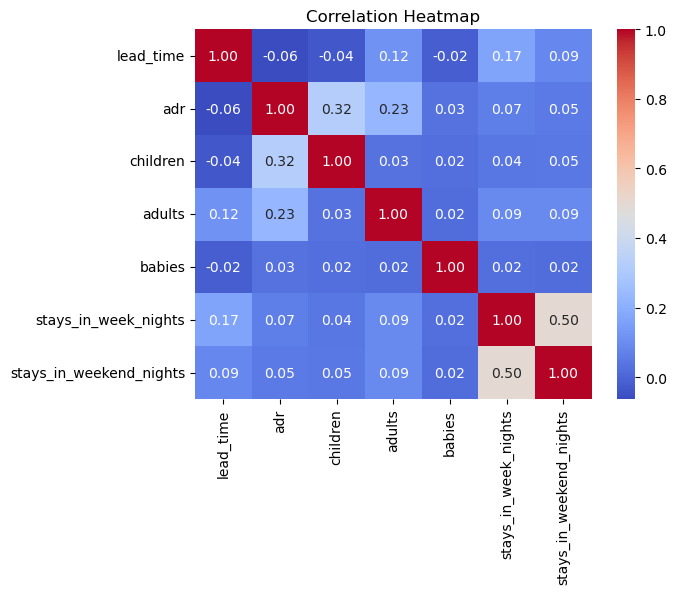

In [135]:
correlation_matrix = data_frame[['lead_time', 'adr', 'children', 'adults', 'babies', 
                                 'stays_in_week_nights', 'stays_in_weekend_nights']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

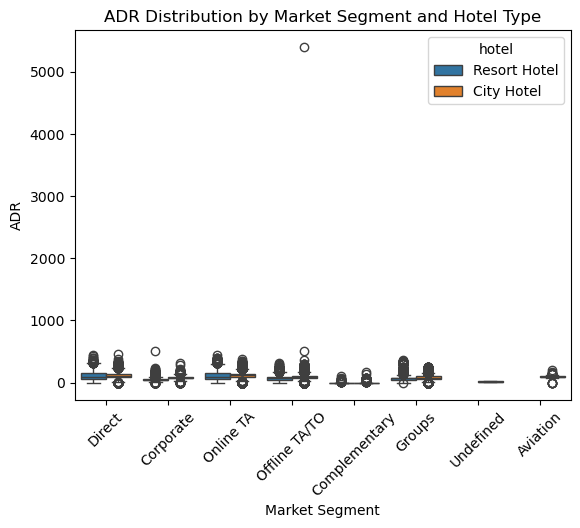

In [143]:
sns.boxplot(data=data_frame, x='market_segment', y='adr', hue='hotel')
plt.title('ADR Distribution by Market Segment and Hotel Type')
plt.xticks(rotation=45)
plt.xlabel('Market Segment')
plt.ylabel('ADR')
plt.show()

In [155]:
data_frame['market_segment'].describe()

count        119390
unique            8
top       Online TA
freq          56477
Name: market_segment, dtype: object

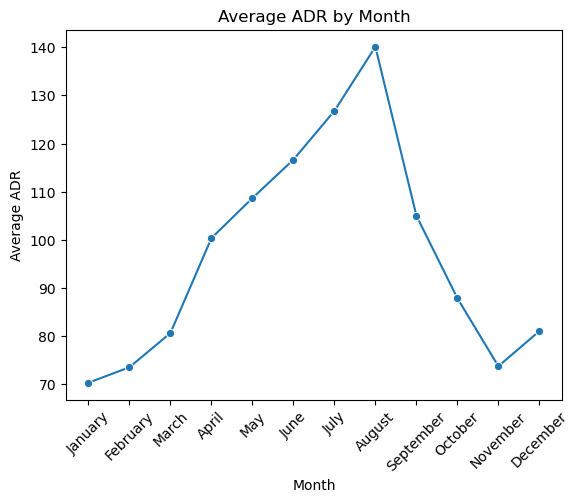

In [170]:
data_frame['arrival_date_month'] = pd.Categorical(data_frame['arrival_date_month'], 
            categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
            'September', 'October', 'November', 'December'],ordered=True)
monthly_adr = data_frame.groupby('arrival_date_month')['adr'].mean().reset_index()
sns.lineplot(data=monthly_adr, x='arrival_date_month', y='adr', marker='o')
plt.title('Average ADR by Month')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Average ADR')
plt.show()

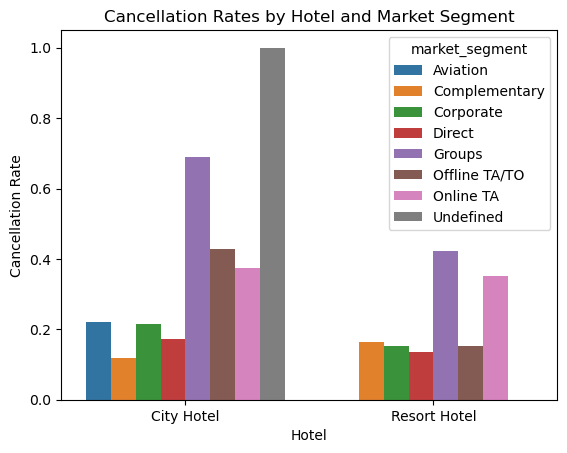

In [168]:
cancel_counts = data_frame.groupby(['hotel', 'market_segment'])['is_canceled'].mean().reset_index()
sns.barplot(data=cancel_counts, x='hotel', y='is_canceled', hue='market_segment')
plt.title('Cancellation Rates by Hotel and Market Segment')
plt.xlabel('Hotel')
plt.ylabel('Cancellation Rate')
plt.show()

In [355]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

In [357]:
x = data_frame[['hotel', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card']]

y = data_frame['is_canceled']

In [359]:
imputer = SimpleImputer(strategy = 'mean')

In [361]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify = y)

In [363]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [395]:
feature_importance = model.feature_importances_

In [381]:
feature_importance

array([1.72474294e-03, 2.74755316e-02, 4.64760510e-03, 2.19545999e-03,
       5.37496045e-03, 2.76262564e-03, 1.66884254e-03, 2.92564000e-03,
       1.29209099e-03, 5.47225502e-04, 6.84012159e-05, 1.17823809e-03,
       3.32145032e-02, 1.87522349e-02, 3.21073867e-03, 6.59635210e-04,
       1.55649607e-02, 1.53681324e-03, 1.64209626e-03, 4.97262758e-03,
       6.11558519e-03, 8.85638416e-02, 1.07993711e-02, 1.22467355e-03,
       4.25344914e-04, 6.05122433e-03, 6.53600722e-03, 8.10488090e-03,
       1.72745809e-02, 6.89491394e-01, 2.47756715e-02, 2.28437087e-03,
       2.28288478e-03, 2.37979311e-03, 2.27540176e-03])

In [387]:
x = ['hotel', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card']

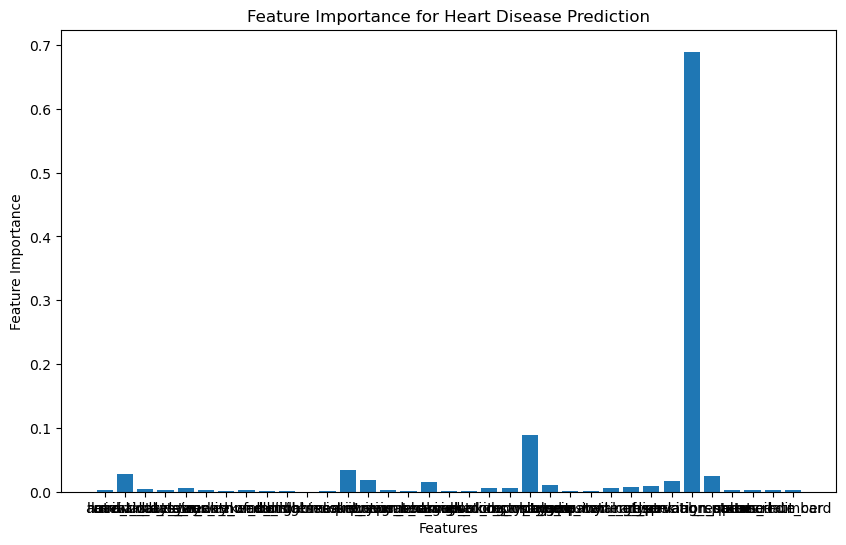

In [409]:
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(x, feature_importance, align='center')  # Create bar chart
plt.xlabel('Features')  # X-axis label
plt.ylabel('Feature Importance')  # Y-axis label
plt.title('Feature Importance for Heart Disease Prediction')  # Title
plt.show()

In [377]:
y.isnull().sum()

0

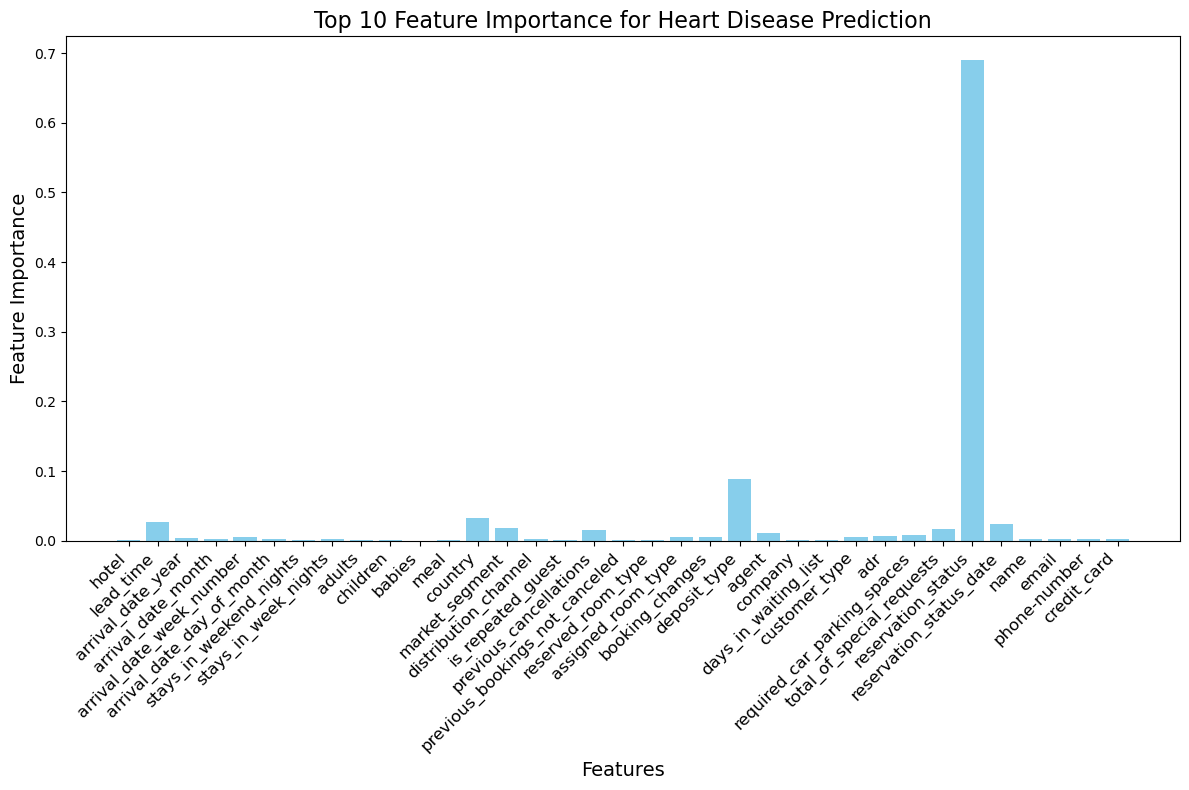

In [415]:
sorted_idx = np.argsort(feature_importance)[::-1]  # Sort in descending order
sorted_features = [x[i] for i in sorted_idx]  # Sorted feature names
sorted_importance = feature_importance[sorted_idx]  # Sorted importances

# Select top 10 features
top_n = 10
top_features = sorted_features[:top_n]
top_importances = sorted_importance[:top_n]
feature_importance = model.feature_importances_
# Create bar chart
plt.figure(figsize=(12, 8))
plt.bar(x, feature_importance, color="skyblue", align="center")
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate x-axis labels
plt.xlabel("Features", fontsize=14)  # X-axis label
plt.ylabel("Feature Importance", fontsize=14)  # Y-axis label
plt.title("Top 10 Feature Importance for Heart Disease Prediction", fontsize=16)  # Title
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()